# IMAGE RECOGNITION

### Data collection using bing image downloader

In [ ]:
from bing_image_downloader import downloader

In [ ]:
downloader.download("Sam Claflin",70,"D:/Projects/Image processing")

In [ ]:
downloader.download("Michelle Obama",70,"D:/Projects/Image processing")

In [ ]:
downloader.download("Ed Sheeran",70,"D:/Projects/Image processing")

### Importing Libraries

In [1]:
#importing system libraries
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
#importing datahandling lib
import numpy as np
import pandas as pd 

In [3]:
#importing data visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#import required components for image processing
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [5]:
sam=os.listdir('D:/Projects/Image Processing/Sam Claflin')

In [6]:
mo=os.listdir('D:/Projects/Image Processing/Michelle Obama')

In [7]:
ed=os.listdir('D:/Projects/Image Processing/Ed Sheeran')

### Reading images as a matrix of numbers

In [8]:
limit=50
samimages=[None]*limit
j=0

for i in sam:
    if(j<limit):
          samimages[j]=imread("D:/Projects/Image Processing/Sam Claflin/"+i)
          j+=1
    else:
          break

In [9]:
moimages=[None]*limit
j=0

for i in mo:
    if(j<limit):
          moimages[j]=imread("D:/Projects/Image Processing/Michelle Obama/"+i)
          j+=1
    else:
          break

In [10]:
edimages=[None]*limit
j=0

for i in ed:
    if(j<limit):
          edimages[j]=imread("D:/Projects/Image Processing/Ed Sheeran/"+i)
          j+=1
    else:
          break

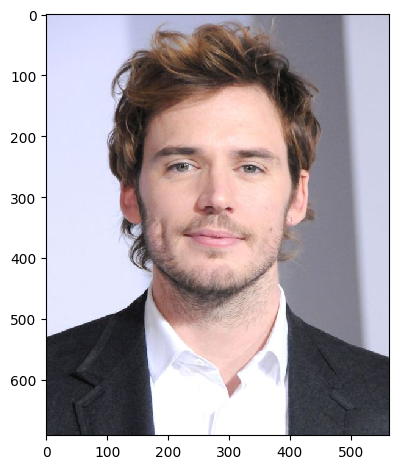

In [11]:
imshow(samimages[37])

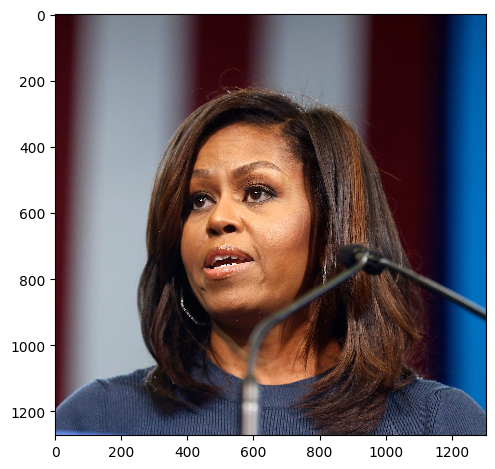

In [12]:
imshow(moimages[36])

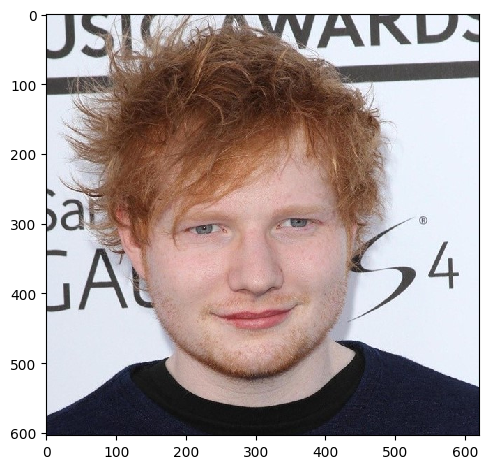

In [13]:
imshow(edimages[29])

### Converting to grayscale

In [14]:
samimages_gray=[None]*limit
j=0

for i in sam:
    if(j<limit):
        samimages_gray[j]=rgb2gray(samimages[j])
        j+=1
    else:
        break

In [15]:
moimages_gray=[None]*limit
j=0

for i in mo:
    if(j<limit):
        moimages_gray[j]=rgb2gray(moimages[j])
        j+=1
    else:
        break

In [16]:
edimages_gray=[None]*limit
j=0

for i in ed:
    if(j<limit):
        edimages_gray[j]=rgb2gray(edimages[j])
        j+=1
    else:
        break

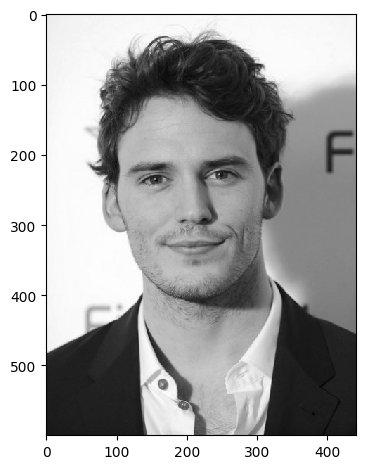

In [17]:
imshow(samimages_gray[39])

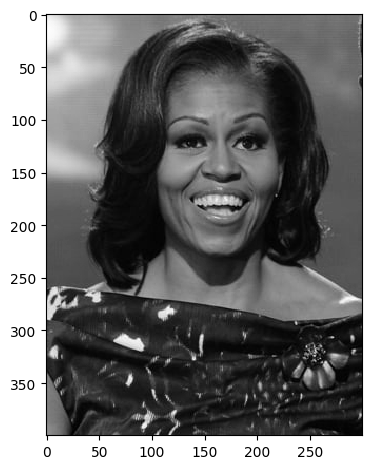

In [18]:
imshow(moimages_gray[45])

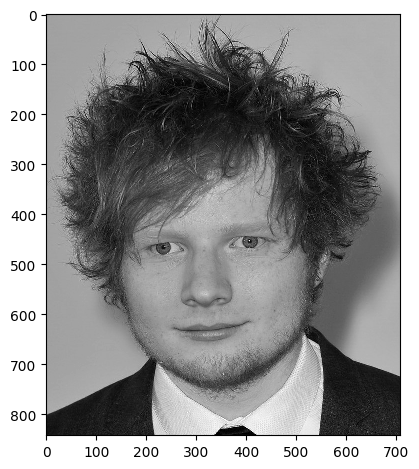

In [19]:
imshow(edimages_gray[24])

In [20]:
samimages_gray[5].shape

(354, 236)

In [21]:
moimages_gray[46].shape

(217, 266)

In [22]:
edimages_gray[34].shape

(1463, 2197)

### Matrix resize

In [23]:
for j in range(50):
    sc=samimages_gray[j]
    samimages_gray[j]=resize(sc,(512,512))

In [24]:
for j in range(50):
    mo=moimages_gray[j]
    moimages_gray[j]=resize(mo,(512,512))

In [25]:
for j in range(50):
    ed=edimages_gray[j]
    edimages_gray[j]=resize(ed,(512,512))

In [26]:
samimages_gray[4].shape

(512, 512)

In [27]:
moimages_gray[4].shape

(512, 512)

In [28]:
edimages_gray[46].shape

(512, 512)

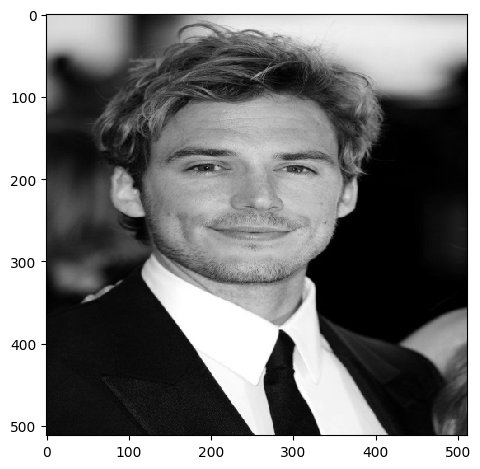

In [29]:
imshow(samimages_gray[12])

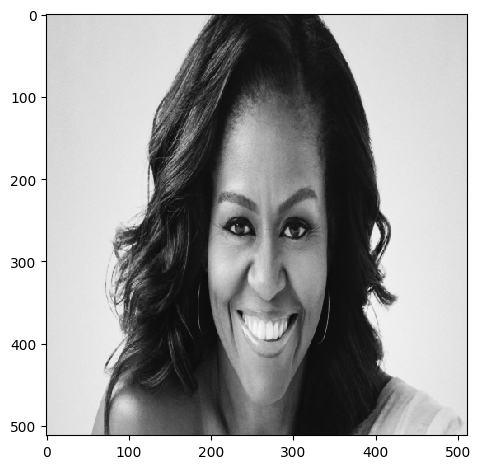

In [30]:
imshow(moimages_gray[34])

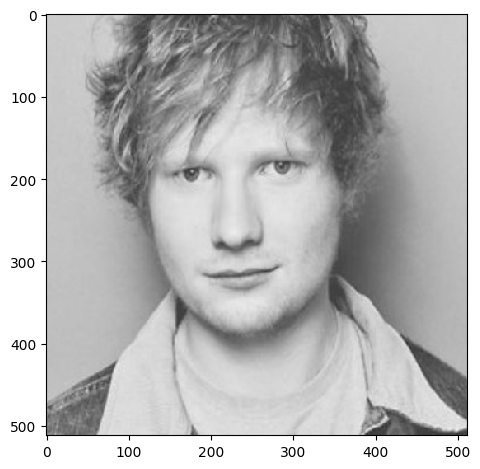

In [31]:
imshow(edimages_gray[35])

### Matrix to vector conversion

In [32]:
#find out the no.of grayscale images
len_of_images_sc=len(samimages_gray)

In [33]:
len_of_images_sc

50

In [34]:
image_size_sc=samimages_gray[1].shape
image_size_sc

(512, 512)

In [35]:
flatten_size_sc=image_size_sc[0]*image_size_sc[1]
flatten_size_sc

262144

In [36]:
#Flattening the arrays
for i in range(len_of_images_sc):
    samimages_gray[i]=np.ndarray.flatten(samimages_gray[i]).reshape(flatten_size_sc,1)

In [37]:
#Stack the individual image array elements into one array
samimages_gray=np.dstack(samimages_gray)

In [38]:
#change the axis of the array elements
samimages_gray=np.rollaxis(samimages_gray,axis=2,start=0)

In [39]:
samimages_gray.shape

(50, 262144, 1)

In [40]:
samimages_gray=samimages_gray.reshape(len_of_images_sc,flatten_size_sc)
samimages_gray.shape

(50, 262144)

### Create a DataFrame - Sam Claflin

In [41]:
sam_data=pd.DataFrame(samimages_gray)

In [42]:
sam_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.042186,0.047362,0.051511,0.047732,0.044483,0.046501,0.045255,0.046375,0.047403,0.044618,...,0.203051,0.206720,0.206833,0.215367,0.242366,0.232510,0.181477,0.208861,0.228935,0.208617
1,0.797134,0.795778,0.790953,0.786128,0.781448,0.780399,0.774625,0.768909,0.764108,0.759283,...,0.094491,0.094261,0.084076,0.094942,0.097703,0.112375,0.124451,0.132479,0.111889,0.131038
2,0.838330,0.838330,0.838330,0.838330,0.838330,0.838330,0.838330,0.838330,0.839777,0.842251,...,0.045902,0.051524,0.056319,0.058058,0.055169,0.049415,0.044454,0.039659,0.041605,0.041605
3,0.664331,0.667842,0.671835,0.675000,0.675483,0.679511,0.683447,0.689112,0.699455,0.696848,...,0.416537,0.414347,0.399100,0.391314,0.384213,0.365917,0.345299,0.325104,0.306573,0.294234
4,0.712631,0.714102,0.710916,0.707729,0.715595,0.726092,0.734457,0.738791,0.743126,0.731905,...,0.202863,0.224363,0.267339,0.310315,0.342281,0.368417,0.402932,0.472634,0.542337,0.510167
5,0.458226,0.457613,0.461229,0.465219,0.470363,0.475253,0.477060,0.478868,0.479289,0.479568,...,0.764763,0.762676,0.761458,0.768689,0.775919,0.781480,0.786903,0.590548,0.328447,0.372871
6,0.764417,0.764676,0.763147,0.759910,0.751430,0.742674,0.730579,0.718484,0.717356,0.717356,...,0.031847,0.033655,0.035294,0.035294,0.035294,0.033624,0.031817,0.030009,0.028202,0.028508
7,0.581976,0.580489,0.578644,0.576447,0.574698,0.574734,0.575036,0.571278,0.572819,0.578476,...,0.931363,0.921897,0.918675,0.897097,0.882719,0.861321,0.624584,0.178195,0.171279,0.155489
8,0.317864,0.323266,0.324317,0.328226,0.335615,0.340167,0.342509,0.339117,0.349934,0.346285,...,0.058267,0.026450,0.043473,0.050315,0.046696,0.055859,0.049820,0.056989,0.059889,0.055868
9,0.453089,0.453851,0.457504,0.462365,0.471078,0.475939,0.478459,0.478541,0.478764,0.481082,...,0.736333,0.764951,0.772173,0.763242,0.763036,0.773718,0.767031,0.773348,0.294411,0.002287


In [43]:
sam_data['label']="sam claflin"

In [44]:
sam_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.042186,0.047362,0.051511,0.047732,0.044483,0.046501,0.045255,0.046375,0.047403,0.044618,...,0.206720,0.206833,0.215367,0.242366,0.232510,0.181477,0.208861,0.228935,0.208617,sam claflin
1,0.797134,0.795778,0.790953,0.786128,0.781448,0.780399,0.774625,0.768909,0.764108,0.759283,...,0.094261,0.084076,0.094942,0.097703,0.112375,0.124451,0.132479,0.111889,0.131038,sam claflin
2,0.838330,0.838330,0.838330,0.838330,0.838330,0.838330,0.838330,0.838330,0.839777,0.842251,...,0.051524,0.056319,0.058058,0.055169,0.049415,0.044454,0.039659,0.041605,0.041605,sam claflin
3,0.664331,0.667842,0.671835,0.675000,0.675483,0.679511,0.683447,0.689112,0.699455,0.696848,...,0.414347,0.399100,0.391314,0.384213,0.365917,0.345299,0.325104,0.306573,0.294234,sam claflin
4,0.712631,0.714102,0.710916,0.707729,0.715595,0.726092,0.734457,0.738791,0.743126,0.731905,...,0.224363,0.267339,0.310315,0.342281,0.368417,0.402932,0.472634,0.542337,0.510167,sam claflin
5,0.458226,0.457613,0.461229,0.465219,0.470363,0.475253,0.477060,0.478868,0.479289,0.479568,...,0.762676,0.761458,0.768689,0.775919,0.781480,0.786903,0.590548,0.328447,0.372871,sam claflin
6,0.764417,0.764676,0.763147,0.759910,0.751430,0.742674,0.730579,0.718484,0.717356,0.717356,...,0.033655,0.035294,0.035294,0.035294,0.033624,0.031817,0.030009,0.028202,0.028508,sam claflin
7,0.581976,0.580489,0.578644,0.576447,0.574698,0.574734,0.575036,0.571278,0.572819,0.578476,...,0.921897,0.918675,0.897097,0.882719,0.861321,0.624584,0.178195,0.171279,0.155489,sam claflin
8,0.317864,0.323266,0.324317,0.328226,0.335615,0.340167,0.342509,0.339117,0.349934,0.346285,...,0.026450,0.043473,0.050315,0.046696,0.055859,0.049820,0.056989,0.059889,0.055868,sam claflin
9,0.453089,0.453851,0.457504,0.462365,0.471078,0.475939,0.478459,0.478541,0.478764,0.481082,...,0.764951,0.772173,0.763242,0.763036,0.773718,0.767031,0.773348,0.294411,0.002287,sam claflin


In [45]:
len_of_images_mo=len(moimages_gray)

In [46]:
len_of_images_mo

50

In [47]:
image_size_mo=moimages_gray[1].shape
image_size_mo

(512, 512)

In [48]:
flatten_size_mo=image_size_mo[0]*image_size_mo[1]
flatten_size_mo

262144

In [49]:
for i in range(len_of_images_mo):
    moimages_gray[i]=np.ndarray.flatten(moimages_gray[i]).reshape(flatten_size_mo,1)

In [50]:
#Stack the individual image array elements into one array
moimages_gray=np.dstack(moimages_gray)

In [51]:
moimages_gray=np.rollaxis(moimages_gray,axis=2,start=0)

In [52]:
moimages_gray.shape

(50, 262144, 1)

In [53]:
moimages_gray=moimages_gray.reshape(len_of_images_mo,flatten_size_mo)
moimages_gray.shape

(50, 262144)

### Creating DataFrame - Michelle Obama

In [54]:
mo_data=pd.DataFrame(moimages_gray)
mo_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.821197,0.821542,0.818088,0.820418,0.831501,0.838276,0.827805,0.829433,0.827030,0.825491,...,0.916365,0.915766,0.909973,0.919166,0.927499,0.938440,0.942466,0.938253,0.941402,0.940451
1,0.720980,0.720993,0.721431,0.721801,0.722116,0.720882,0.718513,0.715214,0.711314,0.709446,...,0.004066,0.002014,0.000761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.149152,0.146027,0.153160,0.160293,0.162631,0.164075,0.164775,0.164381,0.163986,0.167702,...,0.524106,0.518959,0.518959,0.518959,0.518731,0.518348,0.517359,0.513120,0.508882,0.510739
3,0.418427,0.418427,0.418427,0.418427,0.418427,0.418427,0.418427,0.418427,0.418427,0.418427,...,0.071606,0.083391,0.087892,0.060561,0.047853,0.051416,0.075755,0.103578,0.086937,0.082055
4,0.128762,0.124473,0.120107,0.117886,0.117886,0.112175,0.104106,0.097272,0.094310,0.094310,...,0.018123,0.017728,0.018130,0.018467,0.025338,0.045231,0.019561,0.015115,0.025151,0.038312
5,0.074259,0.074259,0.074259,0.075122,0.076581,0.077456,0.078019,0.079220,0.080679,0.081011,...,0.097257,0.100929,0.101355,0.102162,0.103913,0.105155,0.105447,0.106216,0.107675,0.107764
6,0.892168,0.892168,0.892168,0.892168,0.892168,0.891998,0.891603,0.891603,0.891603,0.891603,...,0.068983,0.074205,0.080151,0.076709,0.069627,0.067793,0.067799,0.071145,0.069801,0.073358
7,0.664714,0.664714,0.664683,0.662831,0.666026,0.665477,0.661738,0.661988,0.664631,0.663372,...,0.686530,0.672166,0.674540,0.683247,0.676809,0.671050,0.678465,0.683951,0.676136,0.675482
8,0.334659,0.330791,0.338704,0.350461,0.358128,0.354275,0.354275,0.354275,0.354275,0.354420,...,0.173740,0.154449,0.153845,0.107934,0.122087,0.137834,0.157450,0.165485,0.165512,0.161597
9,0.800138,0.788168,0.771205,0.756971,0.749986,0.746168,0.748908,0.743740,0.740039,0.740294,...,0.174574,0.196679,0.221133,0.365502,0.648677,0.780908,0.809620,0.820073,0.809732,0.809310


In [55]:
mo_data['label']="michelle obama"
mo_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.821197,0.821542,0.818088,0.820418,0.831501,0.838276,0.827805,0.829433,0.827030,0.825491,...,0.915766,0.909973,0.919166,0.927499,0.938440,0.942466,0.938253,0.941402,0.940451,michelle obama
1,0.720980,0.720993,0.721431,0.721801,0.722116,0.720882,0.718513,0.715214,0.711314,0.709446,...,0.002014,0.000761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,michelle obama
2,0.149152,0.146027,0.153160,0.160293,0.162631,0.164075,0.164775,0.164381,0.163986,0.167702,...,0.518959,0.518959,0.518959,0.518731,0.518348,0.517359,0.513120,0.508882,0.510739,michelle obama
3,0.418427,0.418427,0.418427,0.418427,0.418427,0.418427,0.418427,0.418427,0.418427,0.418427,...,0.083391,0.087892,0.060561,0.047853,0.051416,0.075755,0.103578,0.086937,0.082055,michelle obama
4,0.128762,0.124473,0.120107,0.117886,0.117886,0.112175,0.104106,0.097272,0.094310,0.094310,...,0.017728,0.018130,0.018467,0.025338,0.045231,0.019561,0.015115,0.025151,0.038312,michelle obama
5,0.074259,0.074259,0.074259,0.075122,0.076581,0.077456,0.078019,0.079220,0.080679,0.081011,...,0.100929,0.101355,0.102162,0.103913,0.105155,0.105447,0.106216,0.107675,0.107764,michelle obama
6,0.892168,0.892168,0.892168,0.892168,0.892168,0.891998,0.891603,0.891603,0.891603,0.891603,...,0.074205,0.080151,0.076709,0.069627,0.067793,0.067799,0.071145,0.069801,0.073358,michelle obama
7,0.664714,0.664714,0.664683,0.662831,0.666026,0.665477,0.661738,0.661988,0.664631,0.663372,...,0.672166,0.674540,0.683247,0.676809,0.671050,0.678465,0.683951,0.676136,0.675482,michelle obama
8,0.334659,0.330791,0.338704,0.350461,0.358128,0.354275,0.354275,0.354275,0.354275,0.354420,...,0.154449,0.153845,0.107934,0.122087,0.137834,0.157450,0.165485,0.165512,0.161597,michelle obama
9,0.800138,0.788168,0.771205,0.756971,0.749986,0.746168,0.748908,0.743740,0.740039,0.740294,...,0.196679,0.221133,0.365502,0.648677,0.780908,0.809620,0.820073,0.809732,0.809310,michelle obama


In [56]:
len_of_images_ed=len(edimages_gray)
len_of_images_ed

50

In [57]:
image_size_ed=edimages_gray[1].shape
image_size_ed

(512, 512)

In [58]:
flatten_size_ed=image_size_ed[0]*image_size_ed[1]
flatten_size_ed

262144

In [59]:
for i in range(len_of_images_ed):
    edimages_gray[i]=np.ndarray.flatten(edimages_gray[i]).reshape(flatten_size_ed,1)

In [60]:
edimages_gray=np.dstack(edimages_gray)

In [61]:
edimages_gray=np.rollaxis(edimages_gray,axis=2,start=0)

In [62]:
edimages_gray.shape

(50, 262144, 1)

In [63]:
edimages_gray=edimages_gray.reshape(len_of_images_ed,flatten_size_ed)
edimages_gray.shape

(50, 262144)

### Creating DataFrame - Ed Sheeran

In [64]:
ed_data=pd.DataFrame(edimages_gray)
ed_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.351696,0.350439,0.353733,0.357026,0.369552,0.382795,0.395762,0.408501,0.420167,0.426415,...,0.546984,0.538701,0.520349,0.500006,0.487746,0.485227,0.483030,0.484966,0.486903,0.486164
1,0.473167,0.472714,0.472028,0.470195,0.470056,0.470056,0.469789,0.470053,0.474621,0.478564,...,0.163002,0.167849,0.150701,0.150773,0.162291,0.172181,0.156091,0.139720,0.145183,0.156685
2,0.640815,0.640815,0.640815,0.640815,0.640815,0.640815,0.640815,0.640815,0.640815,0.640815,...,0.124619,0.123838,0.120698,0.120698,0.120698,0.120698,0.120698,0.120468,0.116776,0.116776
3,0.894847,0.894847,0.894847,0.894847,0.894847,0.894847,0.894973,0.895465,0.895957,0.896894,...,0.320546,0.315516,0.313453,0.311391,0.310932,0.311026,0.310034,0.305722,0.301411,0.303556
4,0.202347,0.204030,0.209769,0.195413,0.174228,0.134817,0.096072,0.057925,0.037767,0.023508,...,0.178511,0.198884,0.218978,0.217631,0.218235,0.221009,0.223417,0.225440,0.223142,0.222468
5,0.263829,0.260901,0.257001,0.253094,0.253041,0.253041,0.253041,0.253041,0.249250,0.250053,...,0.036969,0.036838,0.033047,0.033147,0.036800,0.029057,0.025258,0.029164,0.033070,0.036961
6,0.670730,0.670730,0.670730,0.670730,0.669505,0.667054,0.664603,0.662328,0.660463,0.661209,...,0.903944,0.904967,0.904967,0.903661,0.902170,0.904034,0.905941,0.907890,0.911969,0.913695
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.654982,0.704652,0.754322,0.794408,0.816292,0.838176,0.849426,0.853791,0.858155,0.854934
8,0.301417,0.301667,0.300192,0.296188,0.284424,0.272393,0.257123,0.241852,0.239849,0.239209,...,0.341449,0.383125,0.435443,0.591287,0.747132,0.730334,0.699282,0.604743,0.489517,0.509047
9,0.597162,0.599966,0.622480,0.637391,0.648836,0.642164,0.631281,0.623590,0.616891,0.622205,...,0.428356,0.428356,0.430321,0.432428,0.434773,0.437185,0.439883,0.441657,0.441402,0.441371


In [65]:
ed_data['label']="ed sheeran"
ed_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.351696,0.350439,0.353733,0.357026,0.369552,0.382795,0.395762,0.408501,0.420167,0.426415,...,0.538701,0.520349,0.500006,0.487746,0.485227,0.483030,0.484966,0.486903,0.486164,ed sheeran
1,0.473167,0.472714,0.472028,0.470195,0.470056,0.470056,0.469789,0.470053,0.474621,0.478564,...,0.167849,0.150701,0.150773,0.162291,0.172181,0.156091,0.139720,0.145183,0.156685,ed sheeran
2,0.640815,0.640815,0.640815,0.640815,0.640815,0.640815,0.640815,0.640815,0.640815,0.640815,...,0.123838,0.120698,0.120698,0.120698,0.120698,0.120698,0.120468,0.116776,0.116776,ed sheeran
3,0.894847,0.894847,0.894847,0.894847,0.894847,0.894847,0.894973,0.895465,0.895957,0.896894,...,0.315516,0.313453,0.311391,0.310932,0.311026,0.310034,0.305722,0.301411,0.303556,ed sheeran
4,0.202347,0.204030,0.209769,0.195413,0.174228,0.134817,0.096072,0.057925,0.037767,0.023508,...,0.198884,0.218978,0.217631,0.218235,0.221009,0.223417,0.225440,0.223142,0.222468,ed sheeran
5,0.263829,0.260901,0.257001,0.253094,0.253041,0.253041,0.253041,0.253041,0.249250,0.250053,...,0.036838,0.033047,0.033147,0.036800,0.029057,0.025258,0.029164,0.033070,0.036961,ed sheeran
6,0.670730,0.670730,0.670730,0.670730,0.669505,0.667054,0.664603,0.662328,0.660463,0.661209,...,0.904967,0.904967,0.903661,0.902170,0.904034,0.905941,0.907890,0.911969,0.913695,ed sheeran
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.704652,0.754322,0.794408,0.816292,0.838176,0.849426,0.853791,0.858155,0.854934,ed sheeran
8,0.301417,0.301667,0.300192,0.296188,0.284424,0.272393,0.257123,0.241852,0.239849,0.239209,...,0.383125,0.435443,0.591287,0.747132,0.730334,0.699282,0.604743,0.489517,0.509047,ed sheeran
9,0.597162,0.599966,0.622480,0.637391,0.648836,0.642164,0.631281,0.623590,0.616891,0.622205,...,0.428356,0.430321,0.432428,0.434773,0.437185,0.439883,0.441657,0.441402,0.441371,ed sheeran


## Combining DataFrames

In [66]:
half=pd.concat([sam_data,mo_data])

In [67]:
total_data=pd.concat([half,ed_data])
total_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.042186,0.047362,0.051511,0.047732,0.044483,0.046501,0.045255,0.046375,0.047403,0.044618,...,0.206720,0.206833,0.215367,0.242366,0.232510,0.181477,0.208861,0.228935,0.208617,sam claflin
1,0.797134,0.795778,0.790953,0.786128,0.781448,0.780399,0.774625,0.768909,0.764108,0.759283,...,0.094261,0.084076,0.094942,0.097703,0.112375,0.124451,0.132479,0.111889,0.131038,sam claflin
2,0.838330,0.838330,0.838330,0.838330,0.838330,0.838330,0.838330,0.838330,0.839777,0.842251,...,0.051524,0.056319,0.058058,0.055169,0.049415,0.044454,0.039659,0.041605,0.041605,sam claflin
3,0.664331,0.667842,0.671835,0.675000,0.675483,0.679511,0.683447,0.689112,0.699455,0.696848,...,0.414347,0.399100,0.391314,0.384213,0.365917,0.345299,0.325104,0.306573,0.294234,sam claflin
4,0.712631,0.714102,0.710916,0.707729,0.715595,0.726092,0.734457,0.738791,0.743126,0.731905,...,0.224363,0.267339,0.310315,0.342281,0.368417,0.402932,0.472634,0.542337,0.510167,sam claflin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.700696,0.700696,0.700696,0.700696,0.700696,0.700696,0.701416,0.704618,0.704618,0.704618,...,0.236186,0.293570,0.272533,0.340805,0.232740,0.251191,0.268565,0.244512,0.197511,ed sheeran
46,0.782364,0.782364,0.782364,0.782364,0.782364,0.782364,0.782364,0.782364,0.782364,0.782364,...,0.048088,0.031648,0.032147,0.033161,0.028103,0.013023,0.075222,0.161272,0.222841,ed sheeran
47,0.782364,0.782364,0.782364,0.782364,0.782364,0.782364,0.782364,0.782364,0.782364,0.782364,...,0.048088,0.031648,0.032147,0.033161,0.028103,0.013023,0.075222,0.161272,0.222841,ed sheeran
48,0.592098,0.587962,0.583837,0.580517,0.580517,0.580267,0.581078,0.578812,0.573740,0.581911,...,0.098925,0.096612,0.095004,0.092261,0.088125,0.080880,0.082779,0.090445,0.091082,ed sheeran


### Shuffling rows

In [68]:
from sklearn.utils import shuffle

In [69]:
data_indexed=shuffle(total_data).reset_index()
data_indexed

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,23,0.669137,0.669137,0.669137,0.669137,0.669137,0.669107,0.667723,0.667455,0.667477,...,0.114959,0.111615,0.109015,0.105743,0.108332,0.100403,0.097470,0.091117,0.082007,ed sheeran
1,38,0.381871,0.381871,0.381556,0.378143,0.375204,0.372760,0.368595,0.365419,0.365419,...,0.045937,0.044823,0.044565,0.044660,0.044942,0.046331,0.048774,0.049000,0.049000,michelle obama
2,8,0.301417,0.301667,0.300192,0.296188,0.284424,0.272393,0.257123,0.241852,0.239849,...,0.383125,0.435443,0.591287,0.747132,0.730334,0.699282,0.604743,0.489517,0.509047,ed sheeran
3,7,0.664714,0.664714,0.664683,0.662831,0.666026,0.665477,0.661738,0.661988,0.664631,...,0.672166,0.674540,0.683247,0.676809,0.671050,0.678465,0.683951,0.676136,0.675482,michelle obama
4,12,0.837779,0.840043,0.841701,0.841701,0.844569,0.845622,0.845622,0.845622,0.846683,...,0.200020,0.190638,0.191422,0.216327,0.210382,0.202629,0.174996,0.135472,0.125718,sam claflin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,32,0.064742,0.064840,0.066223,0.069082,0.071800,0.073159,0.072728,0.070010,0.067140,...,0.045277,0.054255,0.052462,0.051924,0.054850,0.064950,0.065262,0.061920,0.058372,sam claflin
146,10,0.623867,0.623867,0.625763,0.630443,0.631710,0.635531,0.635632,0.635632,0.635632,...,0.104476,0.104476,0.104476,0.104375,0.100540,0.100447,0.098476,0.096633,0.096633,michelle obama
147,11,0.906344,0.906302,0.906322,0.906324,0.906300,0.906346,0.906293,0.906331,0.906315,...,0.068103,0.068103,0.068103,0.068103,0.068103,0.068103,0.068103,0.068103,0.068103,ed sheeran
148,15,0.697168,0.697168,0.697168,0.697168,0.697168,0.697168,0.697168,0.697168,0.697168,...,0.231671,0.245197,0.224867,0.221708,0.237653,0.227174,0.202699,0.084955,0.050417,ed sheeran


In [70]:
data=data_indexed.drop(['index'],axis=1)

In [71]:
data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.669137,0.669137,0.669137,0.669137,0.669137,0.669107,0.667723,0.667455,0.667477,0.668790,...,0.114959,0.111615,0.109015,0.105743,0.108332,0.100403,0.097470,0.091117,0.082007,ed sheeran
1,0.381871,0.381871,0.381556,0.378143,0.375204,0.372760,0.368595,0.365419,0.365419,0.366731,...,0.045937,0.044823,0.044565,0.044660,0.044942,0.046331,0.048774,0.049000,0.049000,michelle obama
2,0.301417,0.301667,0.300192,0.296188,0.284424,0.272393,0.257123,0.241852,0.239849,0.239209,...,0.383125,0.435443,0.591287,0.747132,0.730334,0.699282,0.604743,0.489517,0.509047,ed sheeran
3,0.664714,0.664714,0.664683,0.662831,0.666026,0.665477,0.661738,0.661988,0.664631,0.663372,...,0.672166,0.674540,0.683247,0.676809,0.671050,0.678465,0.683951,0.676136,0.675482,michelle obama
4,0.837779,0.840043,0.841701,0.841701,0.844569,0.845622,0.845622,0.845622,0.846683,0.849544,...,0.200020,0.190638,0.191422,0.216327,0.210382,0.202629,0.174996,0.135472,0.125718,sam claflin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.064742,0.064840,0.066223,0.069082,0.071800,0.073159,0.072728,0.070010,0.067140,0.066064,...,0.045277,0.054255,0.052462,0.051924,0.054850,0.064950,0.065262,0.061920,0.058372,sam claflin
146,0.623867,0.623867,0.625763,0.630443,0.631710,0.635531,0.635632,0.635632,0.635632,0.635632,...,0.104476,0.104476,0.104476,0.104375,0.100540,0.100447,0.098476,0.096633,0.096633,michelle obama
147,0.906344,0.906302,0.906322,0.906324,0.906300,0.906346,0.906293,0.906331,0.906315,0.906309,...,0.068103,0.068103,0.068103,0.068103,0.068103,0.068103,0.068103,0.068103,0.068103,ed sheeran
148,0.697168,0.697168,0.697168,0.697168,0.697168,0.697168,0.697168,0.697168,0.697168,0.697168,...,0.231671,0.245197,0.224867,0.221708,0.237653,0.227174,0.202699,0.084955,0.050417,ed sheeran


### Assigning dependent and independent variables

In [72]:
x=data.values[:,:-1]
y=data.values[:,-1]
x

array([[0.6691368627450982, 0.6691368627450982, 0.6691368627450982, ...,
        0.09746982431959315, 0.09111734913020146, 0.08200679671230554],
       [0.3818710906862745, 0.3818710906862745, 0.38155555538401886, ...,
        0.04877444240196079, 0.04900039215686275, 0.04900039215686275],
       [0.3014169680457022, 0.3016670332097073, 0.30019164874207743, ...,
        0.6047429664821252, 0.48951664447260845, 0.5090465295589672],
       ...,
       [0.9063436947990868, 0.9063020383049463, 0.9063218747307275, ...,
        0.06810313725490197, 0.06810313725490197, 0.06810313725490197],
       [0.6971682352941178, 0.6971682352941178, 0.6971682352941178, ...,
        0.2026989608226103, 0.08495496380974264, 0.050416724685968126],
       [0.0642304611545583, 0.07047642736185142, 0.07052739042144886,
        ..., 0.16556807668312842, 0.16337323793946007,
        0.16089002230080549]], dtype=object)

In [73]:
y

array(['ed sheeran', 'michelle obama', 'ed sheeran', 'michelle obama',
       'sam claflin', 'michelle obama', 'sam claflin', 'michelle obama',
       'sam claflin', 'ed sheeran', 'sam claflin', 'michelle obama',
       'michelle obama', 'ed sheeran', 'ed sheeran', 'ed sheeran',
       'sam claflin', 'michelle obama', 'sam claflin', 'michelle obama',
       'ed sheeran', 'michelle obama', 'sam claflin', 'sam claflin',
       'ed sheeran', 'ed sheeran', 'ed sheeran', 'michelle obama',
       'michelle obama', 'ed sheeran', 'sam claflin', 'sam claflin',
       'michelle obama', 'michelle obama', 'sam claflin',
       'michelle obama', 'sam claflin', 'ed sheeran', 'michelle obama',
       'sam claflin', 'sam claflin', 'ed sheeran', 'michelle obama',
       'michelle obama', 'michelle obama', 'michelle obama', 'ed sheeran',
       'ed sheeran', 'ed sheeran', 'michelle obama', 'ed sheeran',
       'sam claflin', 'ed sheeran', 'ed sheeran', 'ed sheeran',
       'sam claflin', 'ed sheeran', '

### Splitting the dataset

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Import Support Vector Machine

In [76]:
from sklearn import svm

In [77]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

### Image prediction

In [78]:
y_pred=clf.predict(x_test)

In [79]:
y_pred

array(['ed sheeran', 'sam claflin', 'michelle obama', 'sam claflin',
       'michelle obama', 'michelle obama', 'sam claflin',
       'michelle obama', 'sam claflin', 'sam claflin', 'sam claflin',
       'sam claflin', 'sam claflin', 'ed sheeran', 'michelle obama',
       'ed sheeran', 'ed sheeran', 'sam claflin', 'michelle obama',
       'sam claflin', 'sam claflin', 'michelle obama', 'ed sheeran',
       'sam claflin', 'sam claflin', 'sam claflin', 'michelle obama',
       'michelle obama', 'sam claflin', 'ed sheeran'], dtype=object)

### Prediction Accuracy

In [80]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)

In [81]:
accuracy

0.9333333333333333

### Analysis of prediction

In [82]:
#Analysis of prediction
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_test,y_pred)

array([[ 6,  1,  0],
       [ 0,  8,  1],
       [ 0,  0, 14]], dtype=int64)